<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [ ]:
#Librerias
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
import pandas as pd

***Punto 1***

In [ ]:
y = lambda x: np.exp(x**2)*np.sin(x)
x = np.linspace(-1,1,100)
"""
Derivadas centrales
y : funcion
x : punto para calculo de derivada
h : dif de x
"""
def difcent(x,y,h):
  dy = (y(x+h)-y(x-h))/(2*h)
  return dy

dy = difcent(x,y,h=1E-2)

***Derivada de la funcion con sympy***

In [ ]:
sp.init_printing()
z = sp.symbols('z')
g = lambda z: sp.exp(z**2)*sp.sin(z)
g(z)


 ⎛ 2⎞       
 ⎝z ⎠       
ℯ    ⋅sin(z)

In [ ]:
#derivada de la funcion
dg = sp.diff(g(z),z,1)
Z = sp.lambdify(z,dg,'numpy')

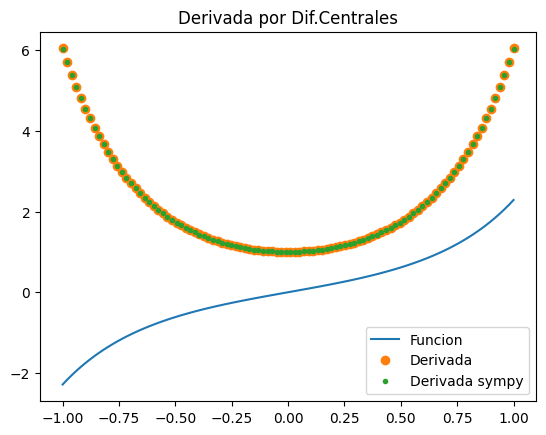

In [ ]:
plt.figure()
plt.title('Derivada por Dif.Centrales')
plt.plot(x,y(x),label='Funcion')
plt.plot(x,dy,"o",label='Derivada')
plt.plot(x,Z(x),".", label='Derivada sympy')
plt.legend()
plt.show()
#fig, axs = plt.subplots(ncols=2,nrows=1)

***Punto 2. Pandas***

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv')
dp = pd.DataFrame(df)
dp

,Unnamed: 0,Tiempo[ms],AnguloDeg,AnguloRad
0,0,9,-30.710388,-0.535997
1,1,42,-30.017673,-0.523907
2,2,75,-28.762547,-0.502001
3,3,108,-26.507523,-0.462644
4,4,142,-24.611229,-0.429547
...,...,...,...,...
2842,2842,94709,4.937576,0.086177
2843,2843,94743,6.479851,0.113095
2844,2844,94776,7.940689,0.138591
2845,2845,94809,9.318092,0.162631


***Punto 3***

*Cálculo del Campo Eléctrico*

In [ ]:
r = 0.0001 #m
K = 8.988*10**9 #Nm^2/C^2
Q =  1*10**-6 #C

V = lambda d: (K*Q)/(np.sqrt(d**2 + r**2))
d = np.linspace(0.0001,0.01,100)

In [ ]:
#derivada simbolica de la funcion con sympy
sp.init_printing()
q,e,k,R = sp.symbols('q e k R')
h =  (k*q)/(sp.sqrt(e**2 + R**2))
dh = -sp.diff(h,e)
dh

   e⋅k⋅q    
────────────
         3/2
⎛ 2    2⎞   
⎝R  + e ⎠   

Campo electrico para z>0

In [ ]:
#Campo electrico por medio del gradiente del potencial
E = -np.gradient(V(d),d)
E

Campo electrico para z = 0.1 mm

In [ ]:
'''
Dado que se definio z como d y este con valores de 0.0001 hasta 0.01,
el primer valor de d es z = 0.1 mm, es decir, 0.0001 metros.
Así que evaluamos el campo en el primer termino para conocer su valor
'''
E = -np.gradient(V(d),d)
print(f'El campo electrico en z = 0.1 mm es: {E[0]} V/m')

El campo electrico en z = 0.1 mm es: 233591995295.1067 V/m


Nota: Hice el calculo manual del valor del campo en el punto que se pide, el resultado es 3.177737875*10^11. El codigo lastimosamente me lanza un numero muy diferente y no pude encontrarle el error.

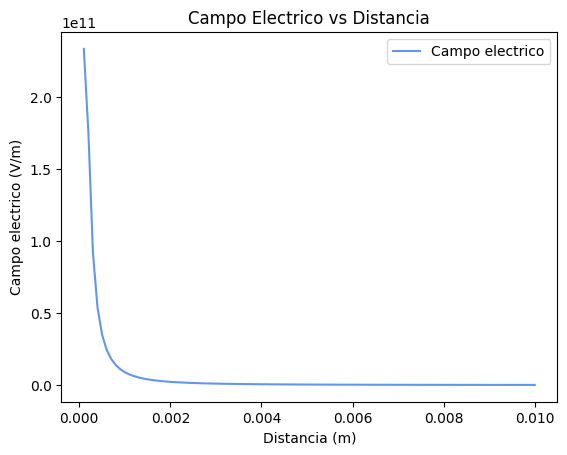

In [ ]:
#Grafica del Campo Electrico vs z
plt.figure()
plt.title('Campo Electrico vs Distancia')
plt.plot(d,E,color='cornflowerblue', label='Campo electrico')
plt.xlabel('Distancia (m)')
plt.ylabel('Campo electrico (V/m)')
plt.legend()
plt.show()